# Exploratory Data Analysis (EDA) of CGN Dataset - Economy and Finance

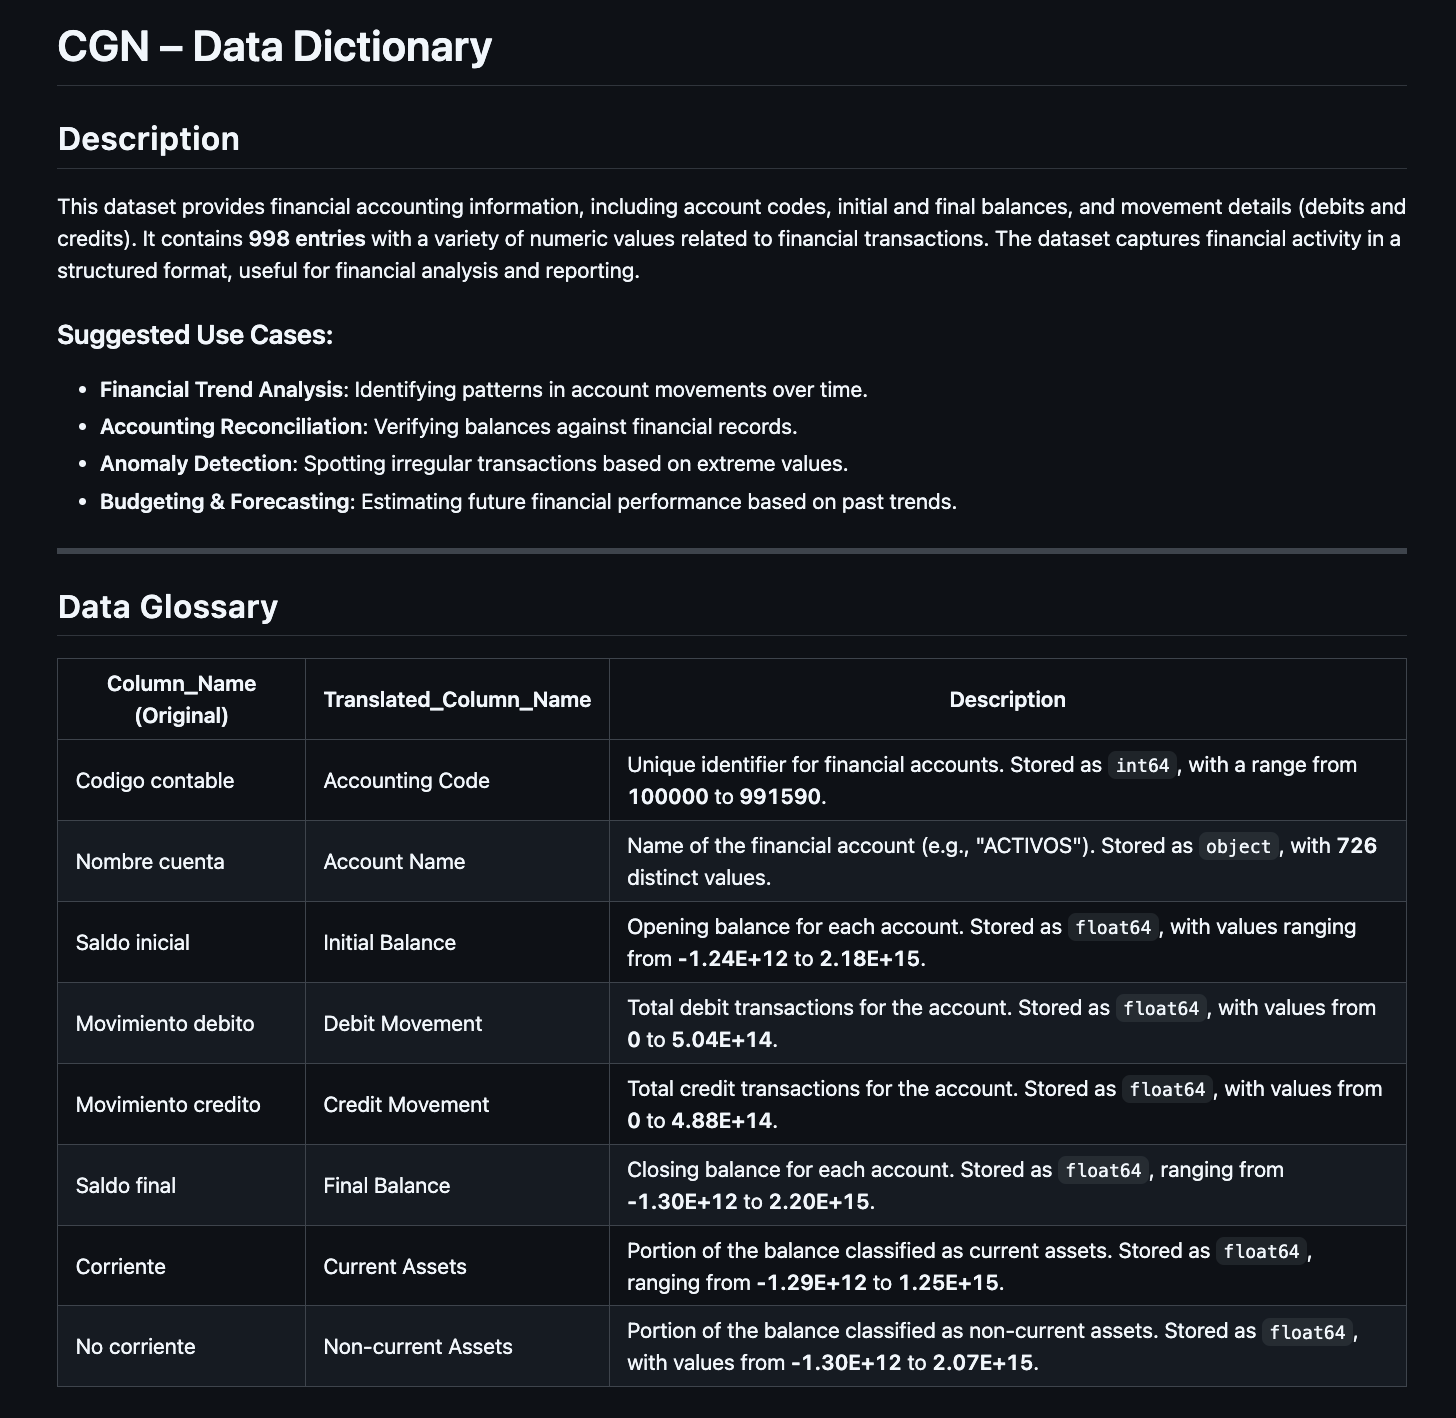

In [1]:
# Import required libraries
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()  # Loads from .env by default

## Define base path (adjust if notebook is in different location)
BASE_PATH = os.getenv('BASE_PATH')

# Verify base path exists
if not BASE_PATH or not os.path.exists(BASE_PATH):
    raise ValueError(f"Invalid BASE_PATH: {BASE_PATH}. Check your .env file and directory structure")

In [2]:
raw = pd.read_parquet(os.path.join(BASE_PATH, 'data/1_Bronze/cgn.parquet'))

In [3]:
df = raw.copy()

In [4]:
df.head()

,Codigo contable,Nombre cuenta,Saldo inicial,Movimiento debito,Movimiento credito,Saldo final,Corriente,No corriente
0,100000,ACTIVOS,2.188810e+14,5.042898e+13,4.887286e+13,2.204371e+14,1.251253e+13,2.079246e+14
1,110000,EFECTIVO Y EQUIVALENTES AL EFECTIVO,5.334106e+12,2.235923e+13,2.360171e+13,4.091626e+12,4.091626e+12,0.000000e+00
2,110500,CAJA,4.916937e+08,1.525195e+11,1.525042e+11,5.070268e+08,5.070268e+08,0.000000e+00
3,110501,Caja principal,0.000000e+00,1.524291e+11,1.524291e+11,0.000000e+00,0.000000e+00,0.000000e+00
4,110502,Caja menor,4.916937e+08,9.042706e+07,7.509397e+07,5.070268e+08,5.070268e+08,0.000000e+00


In [5]:
# list all the unique valies of Nombre cuenta column
df['Nombre cuenta'].unique()

array(['ACTIVOS', 'EFECTIVO Y EQUIVALENTES AL EFECTIVO', 'CAJA',
       'Caja principal', 'Caja menor',
       'DEPÓSITOS EN INSTITUCIONES FINANCIERAS', 'Cuenta corriente',
       'Cuenta de ahorro', 'Depósitos en el exterior',
       'Depósitos para fondos de solidaridad y redistribución del ingreso',
       'FONDOS EN TRÁNSITO', 'Red bancaria', 'Otros depósitos',
       'EFECTIVO DE USO RESTRINGIDO', 'Caja',
       'Depósitos en Instituciones Financieras',
       'EQUIVALENTES AL EFECTIVO', 'Certificados de Depósito a término',
       'Otros equivalentes al efectivo',
       'INVERSIONES E INSTRUMENTOS DERIVADOS',
       'INVERSIONES DE ADMINISTRACIÓN DE LIQUIDEZ A VALOR DE MERCADO (VALOR RAZONABLE) CON CAMBIOS EN EL RESULTADO',
       'Certificados de depósito a término (CDT)',
       'Bonos y títulos emitidos por entidades del exterior',
       'INVERSIONES DE ADMINISTRACIÓN DE LIQUIDEZ A VALOR DE MERCADO (VALOR RAZONABLE) CON CAMBIOS EN EL PATRIMONIO (OTRO RESULTADO INTEGRAL)',
  

## Transportation related values

Impuesto sobre vehículos automotores
Vehicle Motor Tax
(Related to the taxation of vehicles, which affects the transportation sector.)

Derechos de tránsito
Traffic Fees
(Associated with regulating and charging for the use of public roads.)

Participación en el transporte por oleoductos
Participation in Oil Pipeline Transportation
(Linked to the transportation of fuels via pipelines.)

Equipos de transporte, tracción y elevación
Transportation, Traction, and Lifting Equipment
(Includes assets intended for mobility, with subdivisions such as “Terrestrial”, “Maritime and Fluvial”, “Traction”, and “Lifting”.)

Cofinanciación del sistema de transporte masivo de pasajeros
Cofinancing of the Mass Passenger Transport System
(Directly related to the funding and support of urban mobility systems.)

In [9]:
target_accounts = [
    "Impuesto sobre vehículos automotores",
    "Derechos de tránsito",
    "Participación en el transporte por oleoductos",
    "Equipos de transporte, tracción y elevación",
    "Cofinanciación del sistema de transporte masivo de pasajeros"
]

# Filter the DataFrame using .isin()
filtered_df = df[df['Nombre cuenta'].isin(target_accounts)]


In [10]:
filtered_df

,Codigo contable,Nombre cuenta,Saldo inicial,Movimiento debito,Movimiento credito,Saldo final,Corriente,No corriente
40,130533,Impuesto sobre vehículos automotores,1.145300e+08,5.450237e+11,4.097344e+11,1.354038e+11,1.354038e+11,0.000000e+00
52,131112,Participación en el transporte por oleoductos,0.000000e+00,4.751707e+06,4.751707e+06,0.000000e+00,0.000000e+00,0.000000e+00
132,162008,"Equipos de transporte, tracción y elevación",0.000000e+00,1.364670e+09,0.000000e+00,1.364670e+09,0.000000e+00,1.364670e+09
142,163505,"Equipos de transporte, tracción y elevación",1.500183e+10,1.055275e+10,1.420947e+10,1.134511e+10,0.000000e+00,1.134511e+10
154,163711,"Equipos de transporte, tracción y elevación",5.634081e+08,6.458581e+09,5.634468e+09,1.387522e+09,0.000000e+00,1.387522e+09
232,168309,"Equipos de transporte, tracción y elevación",1.780602e+08,0.000000e+00,0.000000e+00,1.780602e+08,0.000000e+00,1.780602e+08
242,168508,"Equipos de transporte, tracción y elevación",-5.786788e+09,1.097332e+07,2.120381e+09,-7.896195e+09,0.000000e+00,-7.896195e+09
514,410533,Impuesto sobre vehículos automotores,1.553631e+11,3.863295e+10,5.450237e+11,6.617539e+11,0.000000e+00,6.617539e+11
526,411025,Participación en el transporte por oleoductos,0.000000e+00,0.000000e+00,4.751707e+06,4.751707e+06,0.000000e+00,4.751707e+06
528,411034,Derechos de tránsito,1.429965e+10,3.554054e+06,1.386677e+10,2.816287e+10,0.000000e+00,2.816287e+10


# (END)